In [41]:
import pandas as pd
import numpy as np
import random

In [42]:
SEED = 42 # answer to everything
# Don't really need reproducibility rn.
# np.random.seed(SEED)
# random.seed(SEED)

LABELLED_FRAC = 0.3
N_TRAIN_SAMPLES = 10000
N_SAMPLES = int(N_TRAIN_SAMPLES // LABELLED_FRAC)
print(f"Total number of samples: {N_SAMPLES}")

ID_VARIABLE_NAME = "ID" # Name of the ID variable BEFORE RENAME.
TARGET_VARIABLE_NAME = "y" # Name of the target BEFORE RENAME.

INITIAL_NOISE = 0.05
FINAL_NOISE = 0.05

CAT_ERROR_PROB = 0.1 # Probability of categorical error
LABELLED_NAN_FRAC = 0.08
UNLABELED_NAN_FRAC = 0.15

LABELLED_DUPLICATE_FRAC = 0.2 # Fraction of rows to duplicate

ARTIFICIAL_TARGET_MULTIPLIER = 1000

DATA_DIR = "data"

Total number of samples: 33333


In [43]:
# Castes: Nominal
castes = ['jut', 'kiv', 'tir', 'vel', 'qou']
castes_f = [30, 25, 25, 20, 40]
castes_p = [f / sum(castes_f) for f in castes_f]
caste_col = np.random.choice(castes, N_SAMPLES, p=castes_p)

# Matter: Ordinal
matter = { # frequency, strength
    'corro': (6, 0),
    'corroyi': (5, 1),
    'sfer': (5, 2),
    'black corru': (3, 4),
    'corruskivi': (2, 10),
    'corrutir': (1, 11),
    'corrutir vel': (1, 12),
    'satik cyst': (5, 15),
    'pale corru': (1, 30),
}
matter_f_sum = sum(freq for freq, _ in matter.values())
matter_p = [freq / matter_f_sum for freq, _ in matter.values()]
matter_names = list(matter.keys())
matter_col = np.random.choice(
    matter_names,
    N_SAMPLES,
    p=matter_p
)

# Mindspike: Ordinal
mindspike_versions = {'tonga': 0, 'karbon': 10, 'silikon': 20, 'kristal': 30, 'nan': 40} # Replace 'nan' with an actual NaN later.
mindspike_v_col = np.random.choice(
    list(mindspike_versions.keys()),
    N_SAMPLES,
    p=[0.1, 0.2, 0.2, 0.4, 0.1]
)

effect_matter = np.array([matter[m_name][1] for m_name in matter_col]) # Get strength values
effect_mindspike = np.array([mindspike_versions[m_name] for m_name in mindspike_v_col]) # Get version values
y = effect_matter + effect_mindspike

for i in range(N_SAMPLES):
    match caste_col[i]:
        case 'jut':
            y[i] *= 2
        case 'kiv':
            y[i] *= 3
        case 'tir':
            y[i] *= 0.75
        case 'vel':
            y[i] *= 1.25
        case 'qou':
            y[i] *= 4

# Normalize y to [0, 1]
min_y = y.min()
max_y = y.max()
y = (y - min_y) / (max_y - min_y)

X = pd.DataFrame({
    'caste': caste_col,
    'matter': matter_col,
    'mindspike': mindspike_v_col,
})
y = pd.Series(y, name=f'y')

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

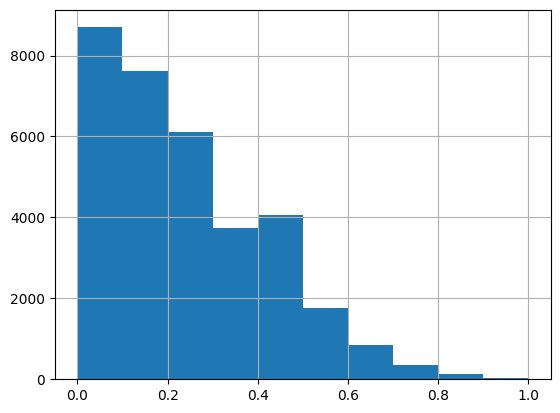

In [45]:
y.hist()

In [46]:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [47]:
df = pd.concat([X, y], axis=1)

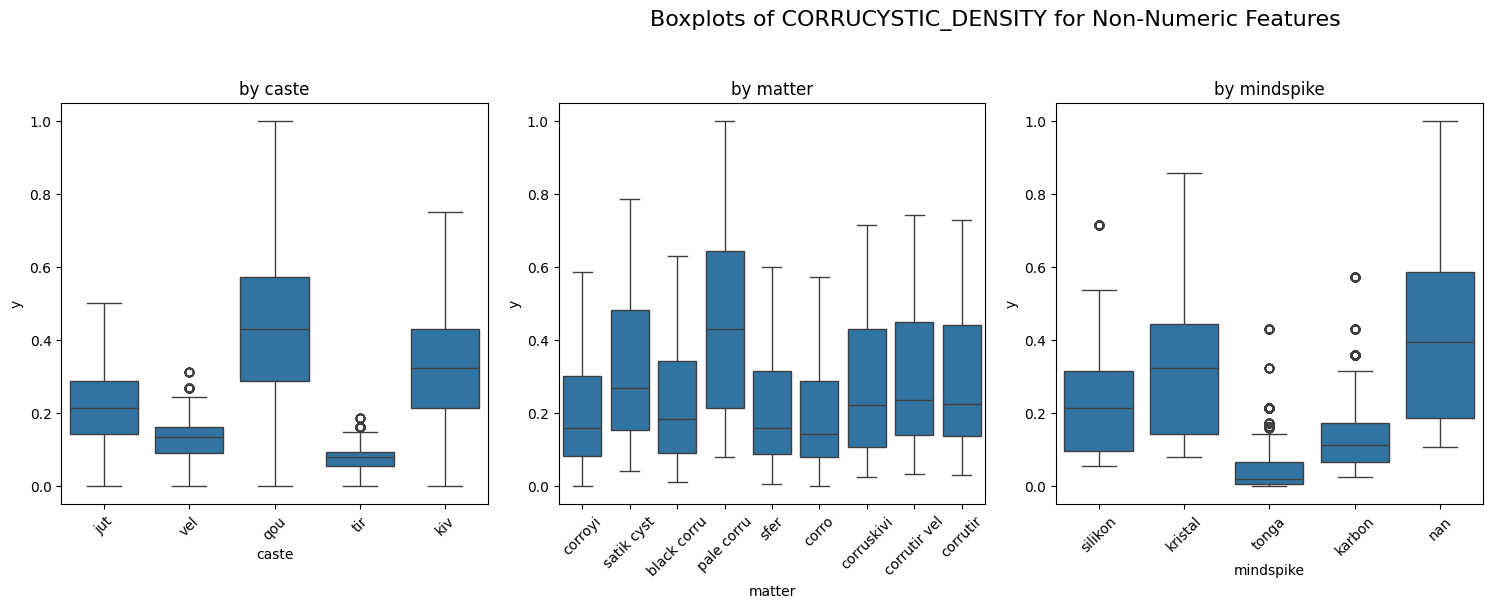

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle(f'Boxplots of CORRUCYSTIC_DENSITY for Non-Numeric Features', fontsize=16, y=1.02)
axes = axes.flatten()

for i, feature in enumerate(cat_cols):
    ax = axes[i]
    sns.boxplot(data=df, x=feature, y=TARGET_VARIABLE_NAME, ax=ax)
    ax.set_title(f'by {feature}')
    ax.tick_params(axis='x', rotation=45)
    
# Hide any unused subplots
for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()